In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline

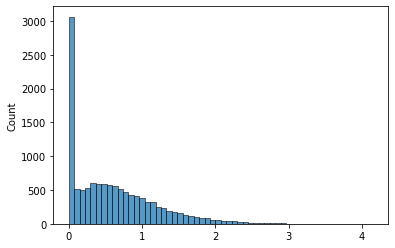

In [27]:
import seaborn as sns
sns.histplot(fc6_npca[:,1])

In [10]:
raw_npca = np.load('data/sketches_raw_nopca.npy')
fc6_npca = np.load('data/sketches_fc6_nopca.npy')
raw_pca  = np.load('data/sketches_raw_pca.npy')
fc6_pca  = np.load('data/sketches_fc6_pca.npy')
metadata = pd.read_csv('data/sketches_metadata.csv')
metadata['category_factored'] = LabelEncoder().fit_transform(metadata.category)

feature_set = [raw_npca, fc6_npca, raw_pca, fc6_pca]
feature_set = [feature_set[i].astype(np.float32) for i in range(4)]
labels_set  = [metadata.sort_values(col).category_factored.values 
               for col in metadata.drop(columns=['category', 'category_factored']).columns]

In [3]:
for j in ['full', 'tied', 'diag','spherical']:
        labels = GaussianMixture(n_components=32, random_state=0, covariance_type=j ).fit_predict(feature_set[1])
        print(f'Trying covariance type {j}: score is {fowlkes_mallows_score(labels_set[1], labels)}')

Trying covariance type full: score is 0.03288421058551639
Trying covariance type tied: score is 0.033055217048237995
Trying covariance type diag: score is 0.033819918817530936
Trying covariance type spherical: score is 0.031305110442415726


In [12]:
for feature, feature_type in zip(feature_set, ['raw_npca', 'fc6_npca', 'raw_pca', 'fc6_pca']):
    labels = GaussianMixture(n_components=32, random_state=0, covariance_type='diag').fit_predict(feature)
    print(f'Trying feature type {feature_type}: score is {fowlkes_mallows_score(labels_set[1], labels)}')

Trying feature type raw_npca: score is 0.10294526687953204
Trying feature type fc6_npca: score is 0.033819918817530936
Trying feature type raw_pca: score is 0.06808289015642656
Trying feature type fc6_pca: score is 0.049310200672924985
